In [2]:
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import pylab

from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors.kde import KernelDensity
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

import os

import itertools

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
"""https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset"""

In [12]:
import random
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.2);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [4]:
df=pd.read_csv("hour.csv")
print(len(df.columns))
print(len(df.index))
df.head(7)

20
17379


instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  Start  End  Duration
0        1  1/1/2011       1   0     1   0        0        6           0           1  0.24  0.2879  0.81     0.0000       3          13   16    NaN  NaN       NaN
1        2  1/1/2011       1   0     1   1        0        6           0           1  0.22  0.2727  0.80     0.0000       8          32   40    NaN  NaN       NaN
2        3  1/1/2011       1   0     1   2        0        6           0           1  0.22  0.2727  0.80     0.0000       5          27   32    NaN  NaN       NaN
3        4  1/1/2011       1   0     1   3        0        6           0           1  0.24  0.2879  0.75     0.0000       3          10   13    NaN  NaN       NaN
4        5  1/1/2011       1   0     1   4        0        6           0           1  0.24  0.2879  0.75     0.0000       0           1    1    NaN  NaN       NaN
5        6  1/1/2011       1   0     1   5        0        6           0           2  0.24  0.2576  0.75     0.0896       0           1    1    NaN  NaN       NaN
6        7  1/1/2011       1   0     1   6        0        6           0           1  0.22  0.2727  0.80     0.0000       2           0    2    NaN  NaN       NaN

In [16]:
df.describe()

instant        season            yr          mnth            hr       holiday       weekday    workingday    weathersit          temp         atemp           hum     windspeed        casual    registered           cnt  Start  End  Duration
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000    0.0  0.0       0.0
mean    8690.0000      2.501640      0.502561      6.537775     11.546752      0.028770      3.003683      0.682721      1.425283      0.496987      0.475775      0.627229      0.190098     35.676218    153.786869    189.463088    NaN  NaN       NaN
std     5017.0295      1.106918      0.500008      3.438776      6.914405      0.167165      2.005771      0.465431      0.639357      0.192556      0.171850      0.192930      0.122340     49.305030    151.357286    181.387599    NaN  NaN       NaN
min        1.0000      1.000000      0.000000      1.000000      0.000000      0.000000      0.000000      0.000000      1.000000      0.020000      0.000000      0.000000      0.000000      0.000000      0.000000      1.000000    NaN  NaN       NaN
25%     4345.5000      2.000000      0.000000      4.000000      6.000000      0.000000      1.000000      0.000000      1.000000      0.340000      0.333300      0.480000      0.104500      4.000000     34.000000     40.000000    NaN  NaN       NaN
50%     8690.0000      3.000000      1.000000      7.000000     12.000000      0.000000      3.000000      1.000000      1.000000      0.500000      0.484800      0.630000      0.194000     17.000000    115.000000    142.000000    NaN  NaN       NaN
75%    13034.5000      3.000000      1.000000     10.000000     18.000000      0.000000      5.000000      1.000000      2.000000      0.660000      0.621200      0.780000      0.253700     48.000000    220.000000    281.000000    NaN  NaN       NaN
max    17379.0000      4.000000      1.000000     12.000000     23.000000      1.000000      6.000000      1.000000      4.000000      1.000000      1.000000      1.000000      0.850700    367.000000    886.000000    977.000000    NaN  NaN       NaN

In [ ]:
"""
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
"""

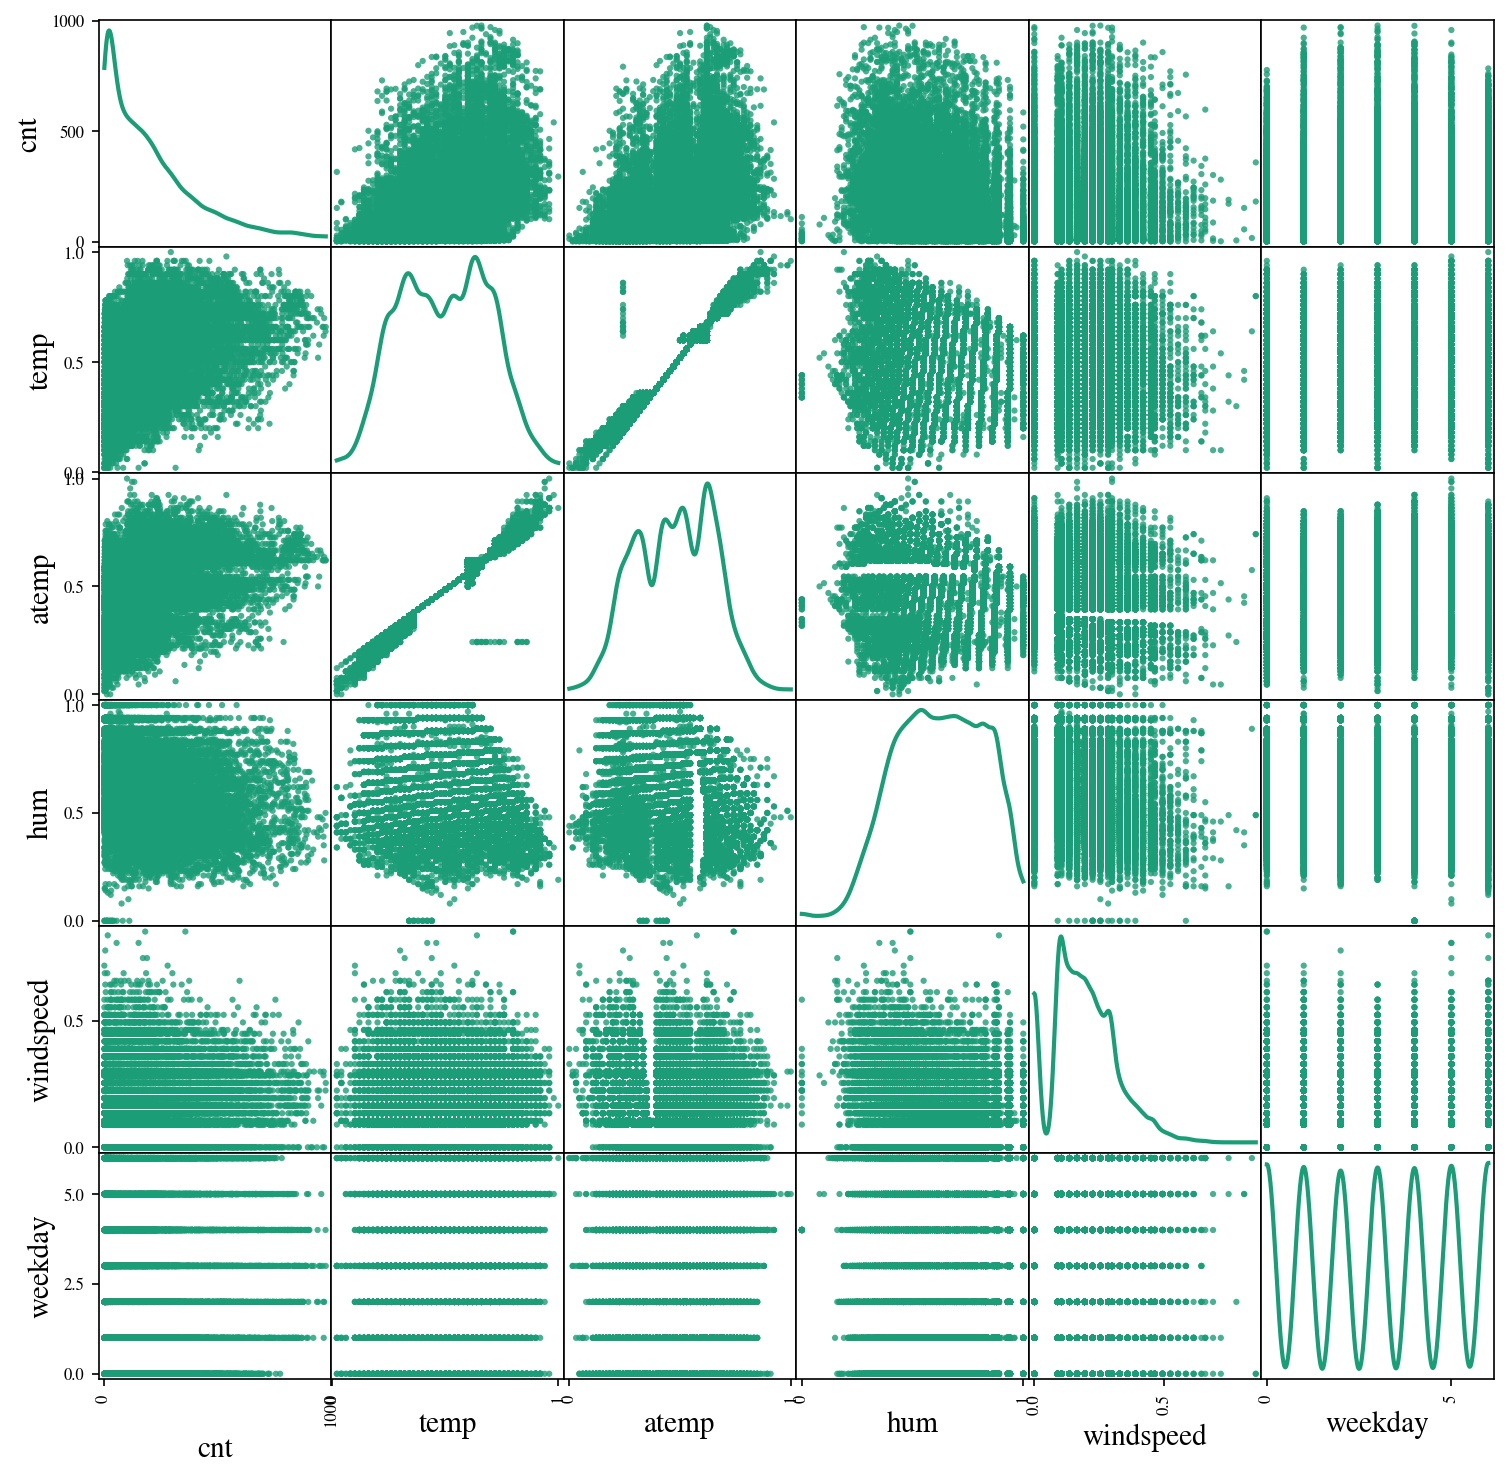

In [5]:
""" Scatter matrix:

"""

smaller_frame=df[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'weekday']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

pylab.savefig('Scatter Matrix', dpi = 80, figsize = (20,6))
plt.show()    

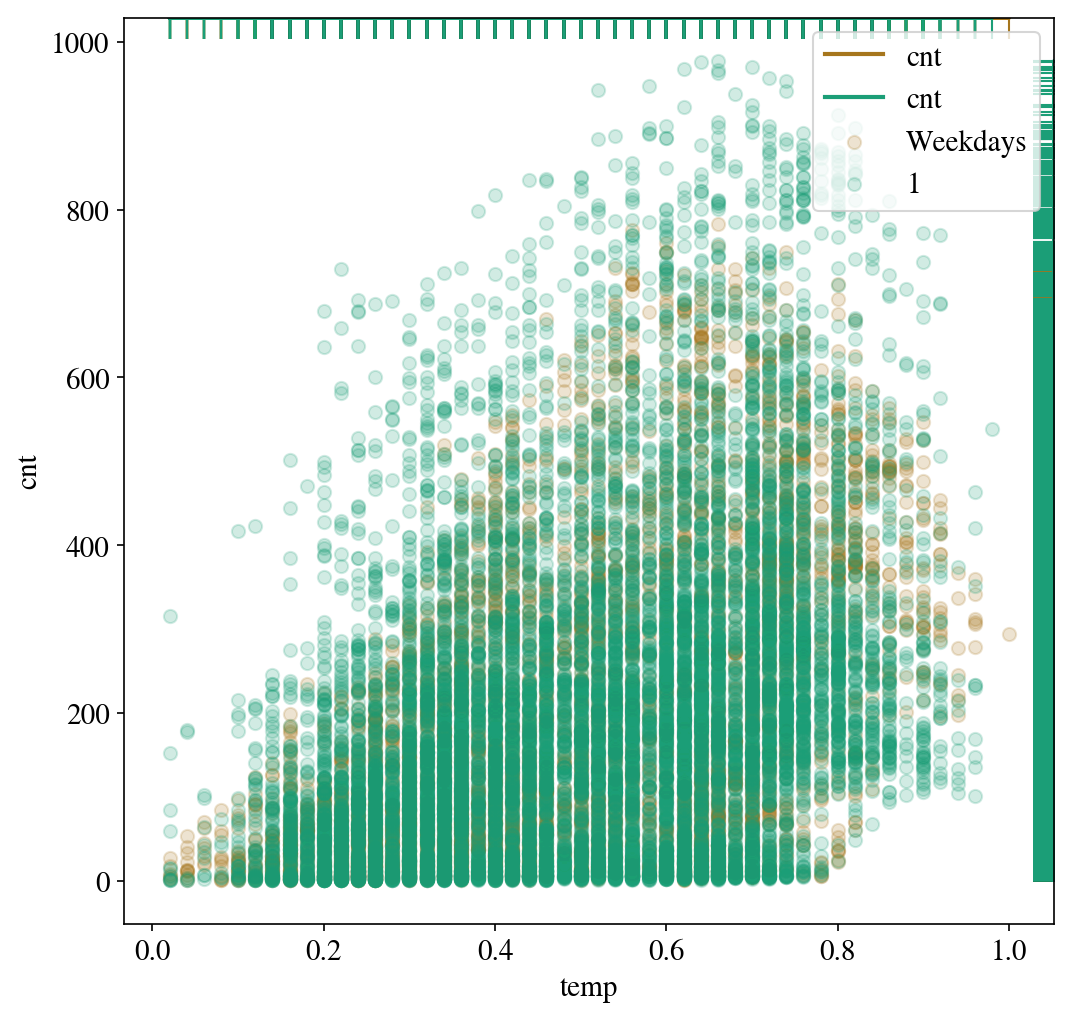

In [14]:
groups = ['Weekends','Weekdays']
amap={e[0]:e[1] for e in zip(df['workingday'],groups)}
ax=scatter_by(df, 'temp', 'cnt', by='workingday', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ Temp with working day', dpi = 80, figsize = (20,6))
plt.show()

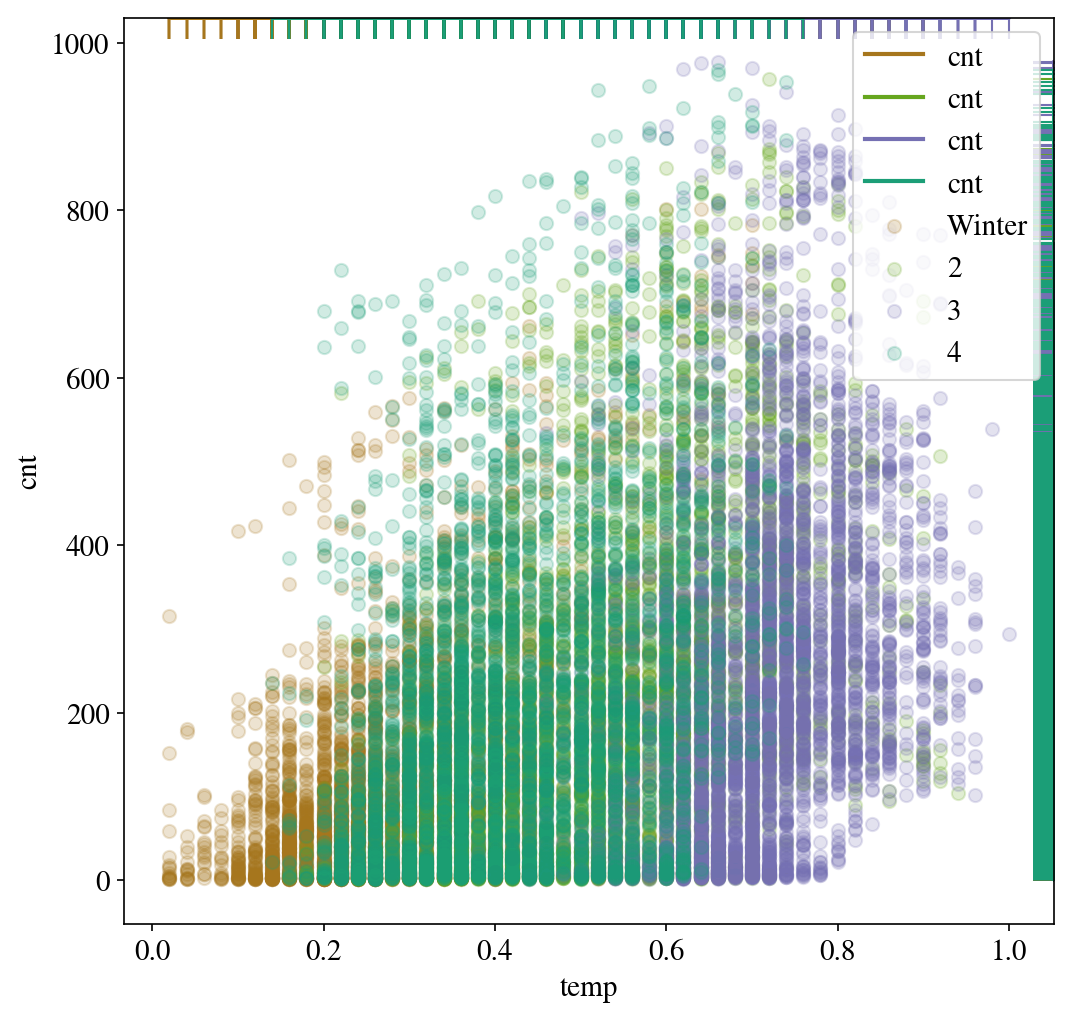

In [21]:
group_2 = ['Fall','Summer', 'Spring', 'Winter']
amap={e[0]:e[1] for e in zip(df['season'],group_2)}
ax=scatter_by(df, 'temp', 'cnt', by='season', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ Temp with season', dpi = 80, figsize = (20,6))
plt.show()

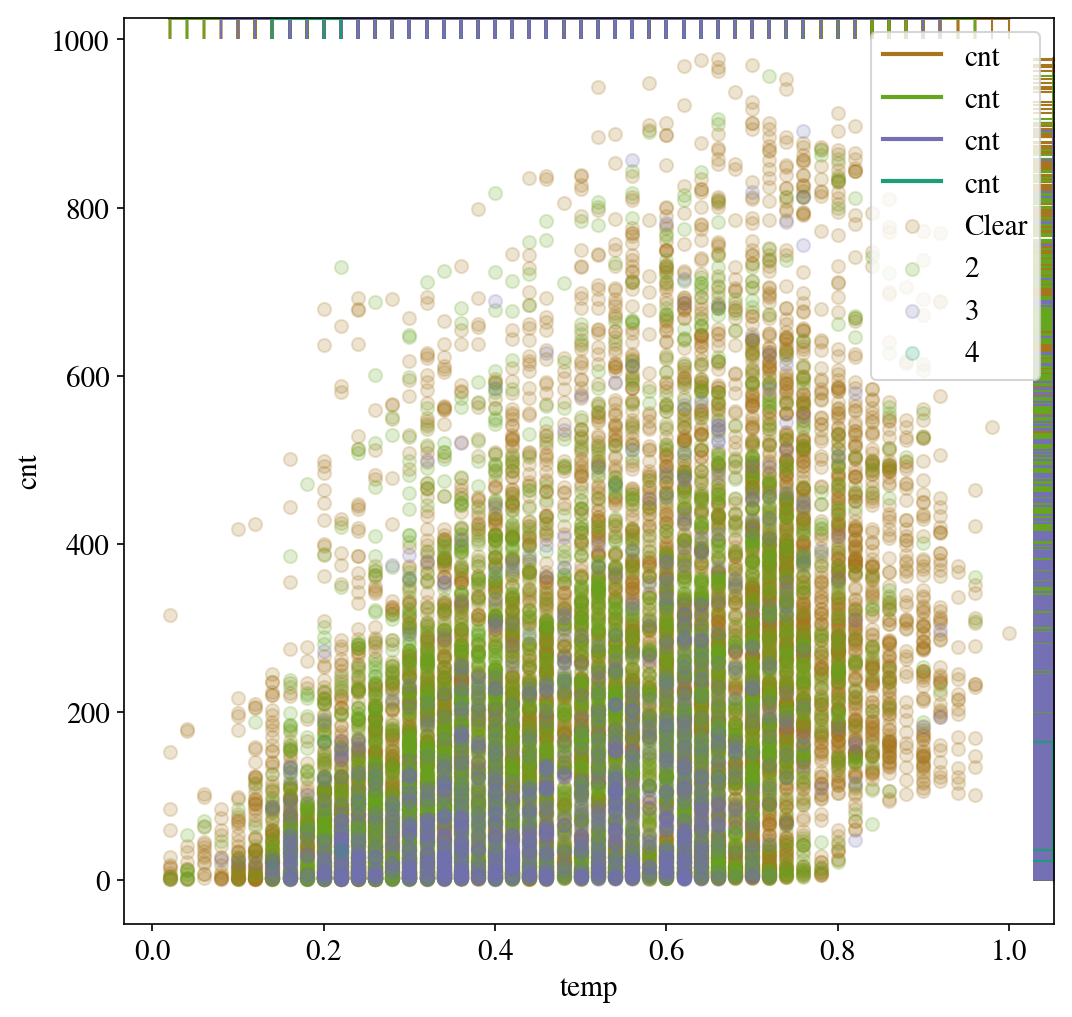

In [22]:
group_2 = ['Heavy','Light', 'Mist', 'Clear']
amap={e[0]:e[1] for e in zip(df['weathersit'],group_2)}
ax=scatter_by(df, 'temp', 'cnt', by='weathersit', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ temp with weather situation', dpi = 80, figsize = (20,6))
plt.show()

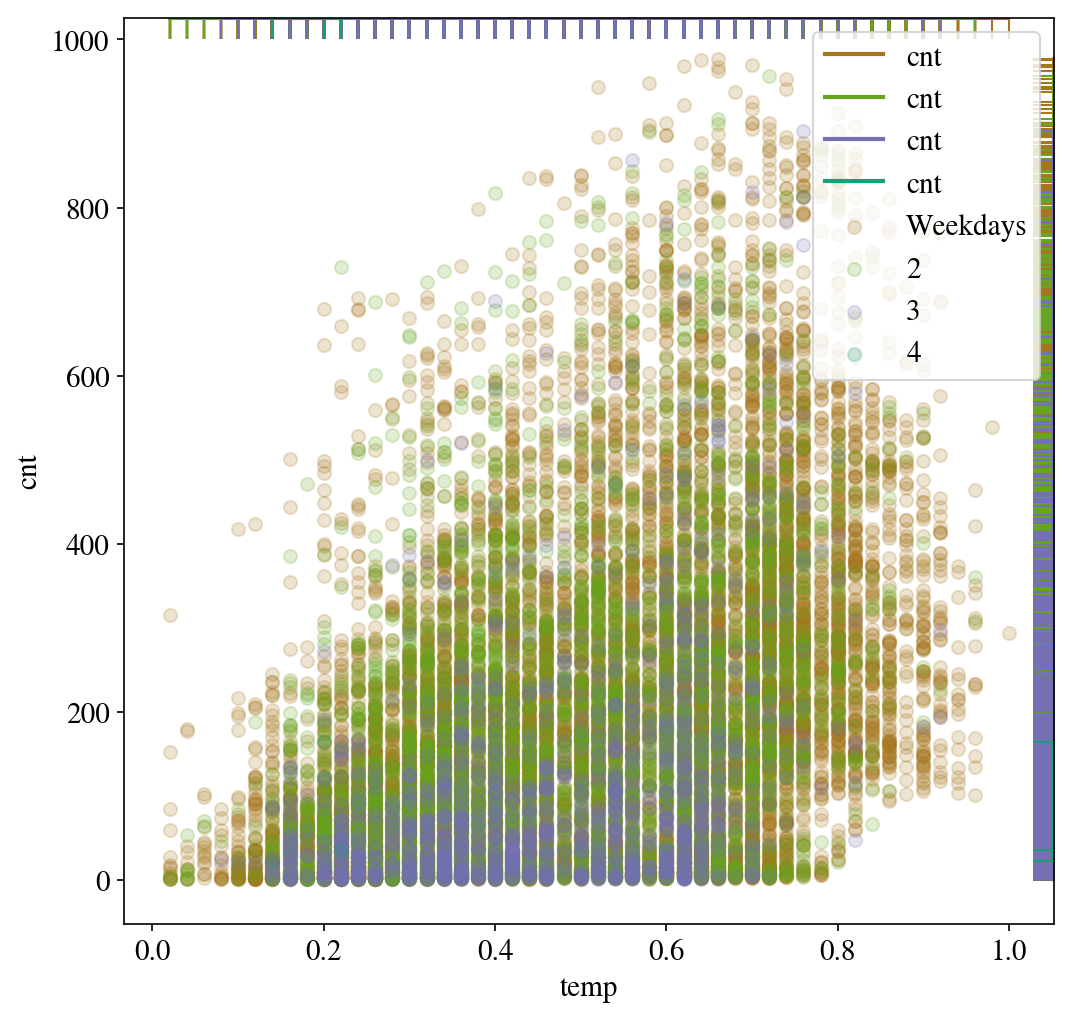

In [24]:
group_2 = ['Weekends', 'Weekdays']
amap={e[0]:e[1] for e in zip(df['weathersit'],group_2)}
ax=scatter_by(df, 'temp', 'cnt', by='weathersit', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ temp with weather situation', dpi = 80, figsize = (20,6))
plt.show()